In [1]:
!pip install imblearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings
from sklearn.feature_selection import RFE
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [4]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [5]:
#num=df.select_dtypes(include=np.number).columns.tolist()
#cat=df.select_dtypes(include=np.object).columns.tolist()
categorical_cols=[c for c in df.columns if df[c].dtype.name=='object']
numerical_cols=[c for c in df.columns if df[c].dtype.name!='object']

In [6]:
numerical_cols

['ID', 'Claim', 'Duration', 'Net Sales', 'Commision (in value)', 'Age']

In [7]:
categorical_cols

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Destination',
 'Gender']

Agency  Claim
ADM     0           63
ART     0          271
        1            1
C2B     0         6192
        1          439
CBH     0           80
        1            1
CCR     0          155
        1            3
CSR     0           67
        1            1
CWT     0         6772
        1           68
EPX     0        27850
        1          152
JWT     0          603
        1            3
JZI     0         5034
        1           25
KML     0          310
        1            7
LWC     0          519
        1           29
RAB     0          570
        1            1
SSI     0          834
        1            5
TST     0          419
        1            2
TTW     0           73
        1            4
Name: Claim, dtype: int64


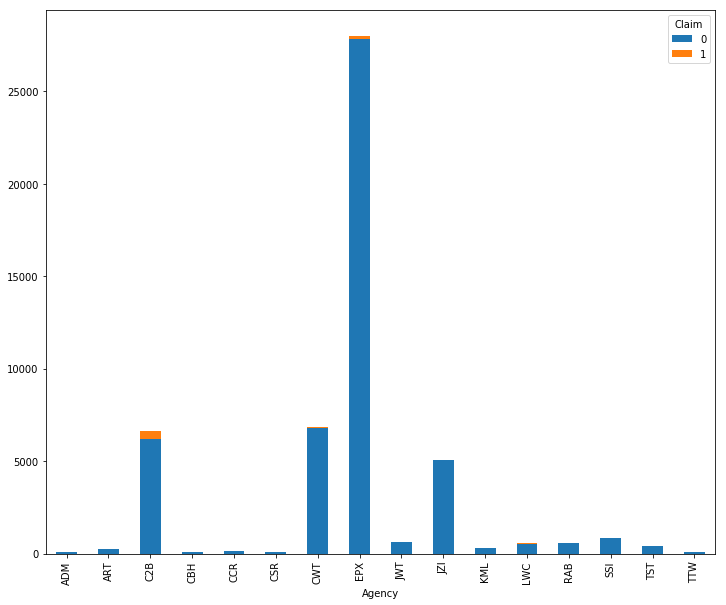

In [8]:
#Univariate Analysis
a=df.groupby('Agency')['Claim'].value_counts()
print(a)
a.unstack().plot(kind='bar',stacked='True',figsize=(12,10))

Agency Type    Claim
Airlines       0        13504
               1          474
Travel Agency  0        36308
               1          267
Name: Claim, dtype: int64


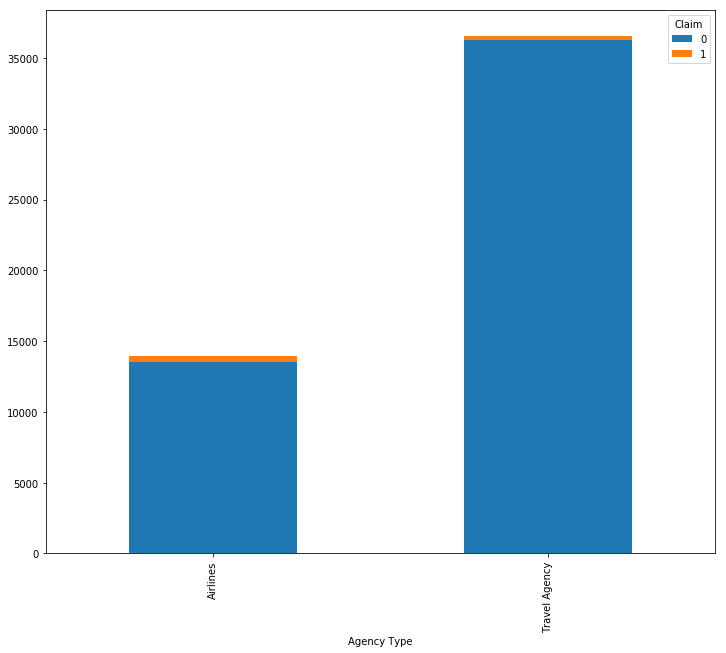

In [9]:
a=df.groupby('Agency Type')['Claim'].value_counts()
print(a)
a.unstack().plot(kind='bar',stacked='True',figsize=(12,10))

Distribution Channel  Claim
Offline               0          871
                      1           17
Online                0        48941
                      1          724
Name: Claim, dtype: int64


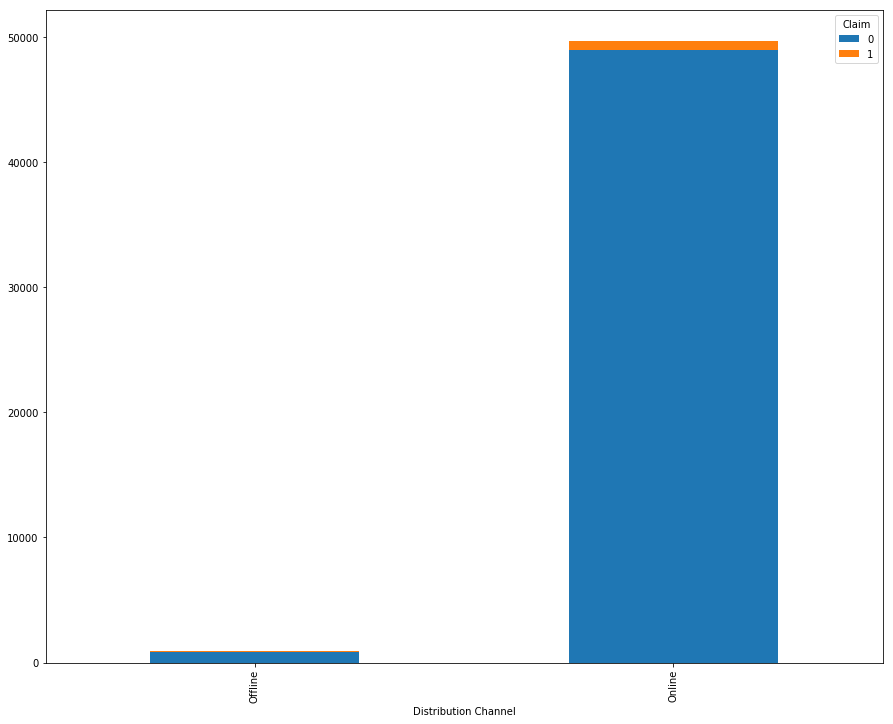

In [10]:
a=df.groupby('Distribution Channel')['Claim'].value_counts()
print(a)
a.unstack().plot(kind='bar',stacked='True',figsize=(15,12))

Gender  Claim
F       0        6795
        1         278
M       0        7289
        1         238
Name: Claim, dtype: int64


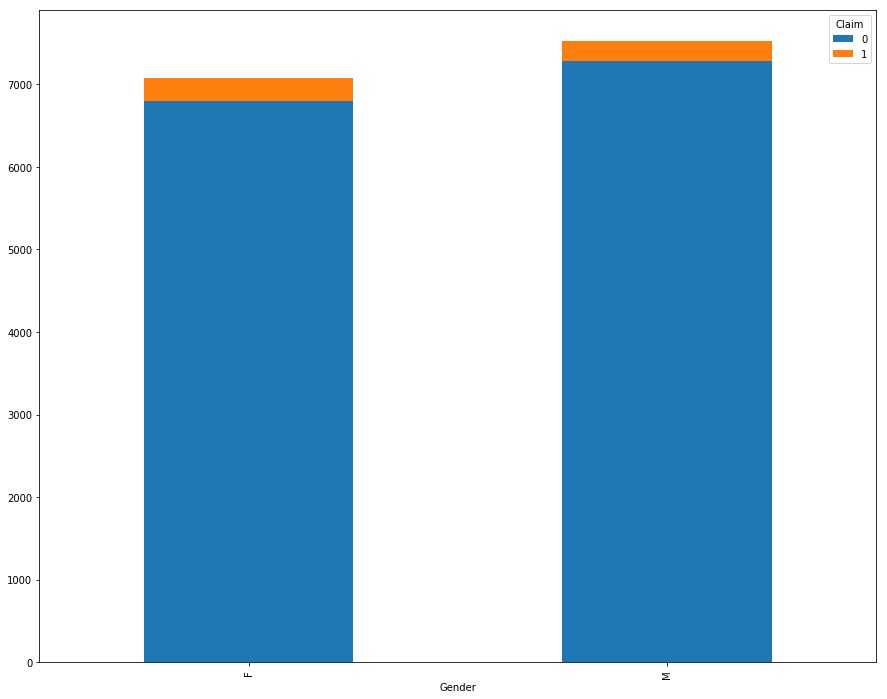

In [11]:
a=df.groupby('Gender')['Claim'].value_counts()
print(a)
a.unstack().plot(kind='bar',stacked='True',figsize=(15,12))

In [12]:
df.fillna('Null',inplace=True)

Product Name                          Claim
1 way Comprehensive Plan              0         2640
                                      1            8
2 way Comprehensive Plan              0        10371
                                      1          111
24 Protect                            0          199
Annual Gold Plan                      0          131
                                      1           17
Annual Silver Plan                    0         1028
                                      1          128
Annual Travel Protect Gold            0           71
                                      1           10
Annual Travel Protect Platinum        0           44
                                      1            1
Annual Travel Protect Silver          0           69
                                      1            4
Basic Plan                            0         4357
                                      1           19
Bronze Plan                           0         3084
  

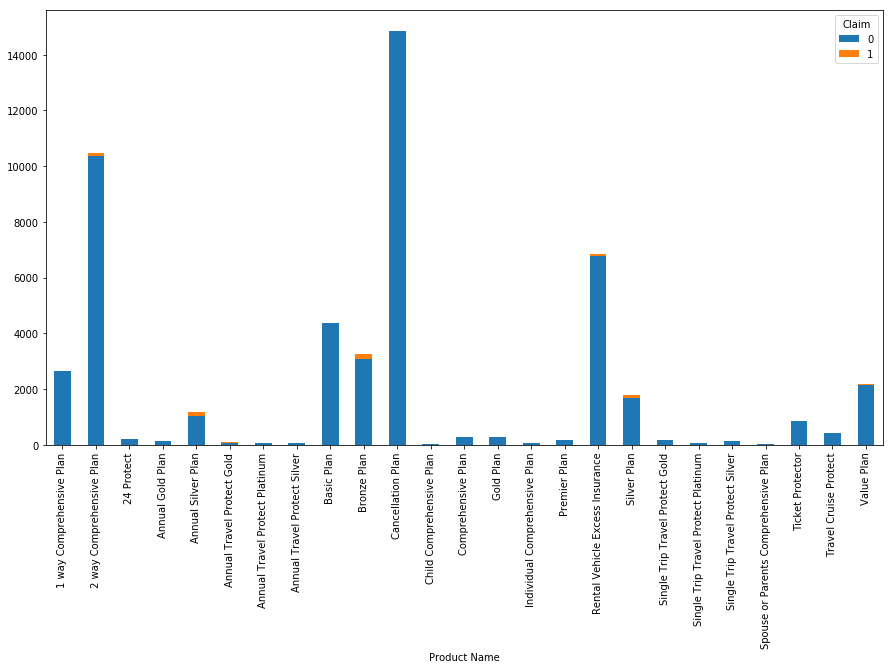

In [13]:
a=df.groupby('Product Name')['Claim'].value_counts()
print(a)
a.unstack().plot(kind='bar',stacked='True',figsize=(15,8))

Destination                   Claim
ARGENTINA                     0          16
                              1           1
AUSTRALIA                     0        2906
                              1          28
AUSTRIA                       0          84
AZERBAIJAN                    0           6
BAHRAIN                       0          11
BANGLADESH                    0          83
BELARUS                       0           2
BELGIUM                       0          36
BERMUDA                       0           2
BHUTAN                        0           1
BOLIVIA                       0           9
BRAZIL                        0          32
BRUNEI DARUSSALAM             0         613
                              1           2
CAMBODIA                      0         394
                              1           1
CANADA                        0         405
                              1           5
CAYMAN ISLANDS                0           1
CHILE                         0         

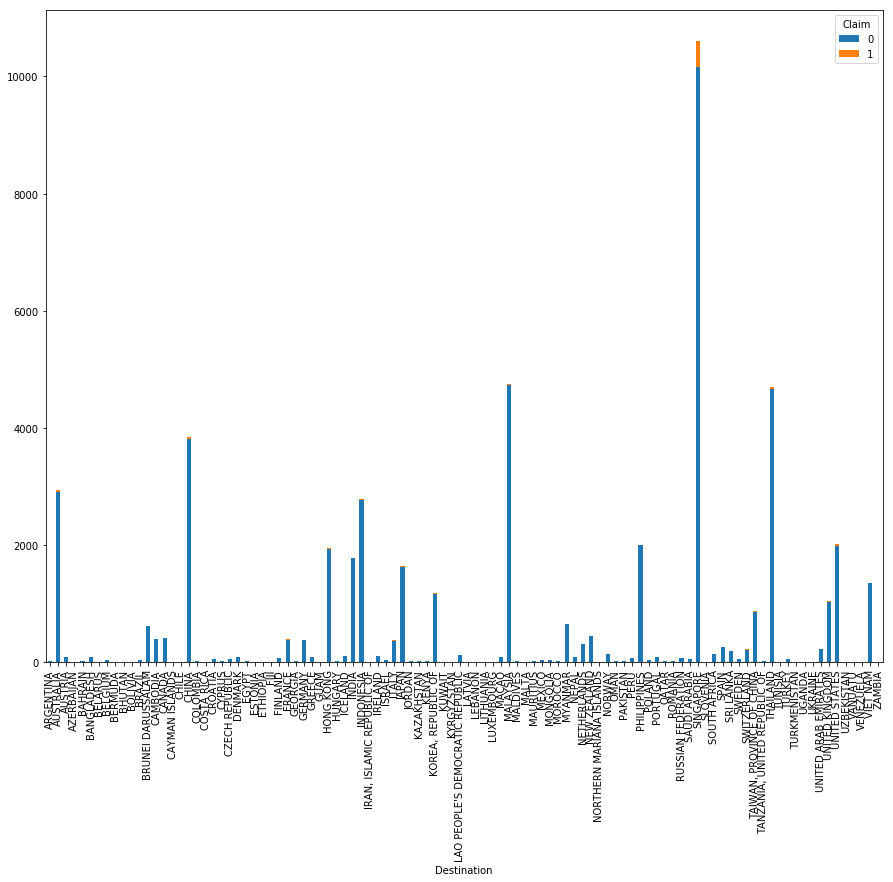

In [14]:
a=df.groupby('Destination')['Claim'].value_counts()
print(a)
a.unstack().plot(kind='bar',stacked='True',figsize=(15,12))

In [15]:
df.corr()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
ID,1.000000,0.040265,0.029771,0.084391,0.114668,0.009026
Claim,0.040265,1.000000,0.076442,0.138323,0.102009,-0.012106
Duration,0.029771,0.076442,1.000000,0.437004,0.349193,0.003212
Net Sales,0.084391,0.138323,0.437004,1.000000,0.657851,0.039119
Commision (in value),0.114668,0.102009,0.349193,0.657851,1.000000,0.119167
Age,0.009026,-0.012106,0.003212,0.039119,0.119167,1.000000


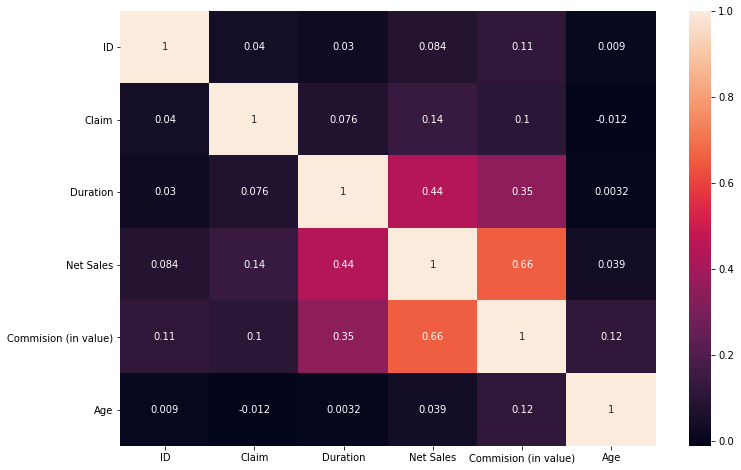

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

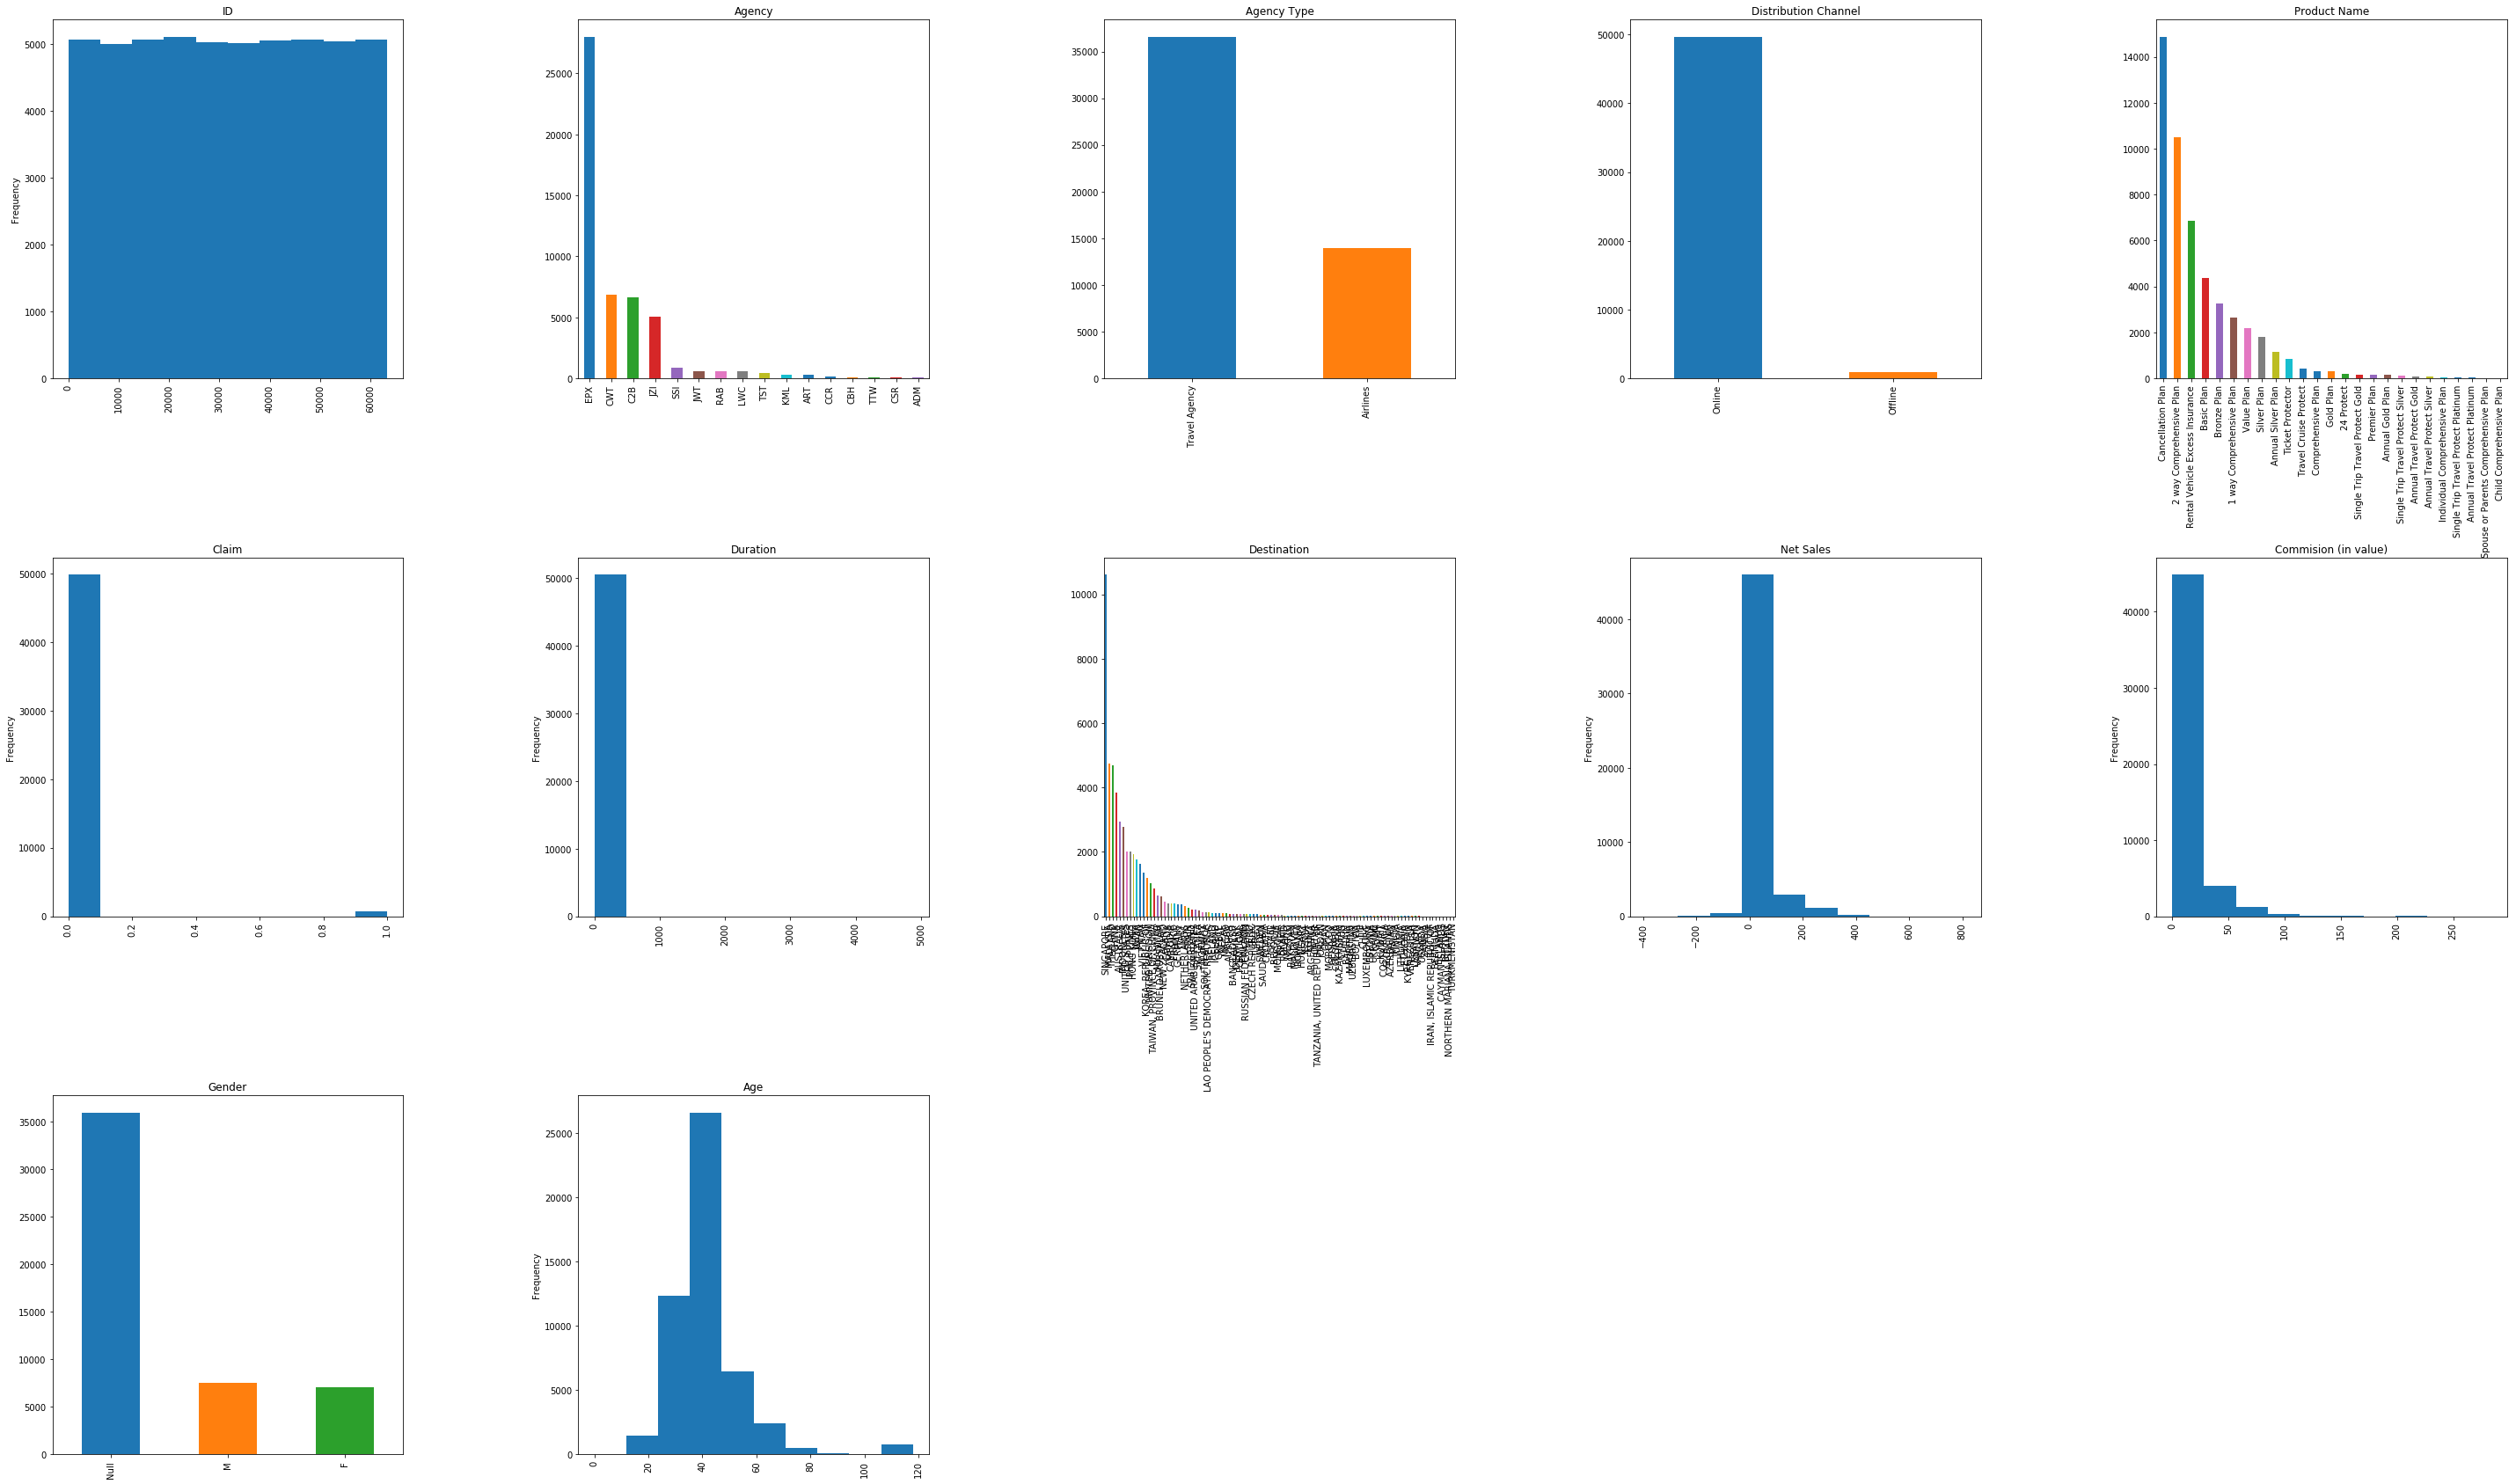

In [17]:
#Checking the count of each attribute and checking skewness
fig=plt.figure(figsize=(50,30))
cols=5
rows=np.ceil(float(df.shape[1])/cols)
for i,c in enumerate(df.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(c)
    if df[c].dtypes==np.object:
        df[c].value_counts().plot(kind='bar')
    else:
        df[c].plot(kind='hist')
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.5,wspace=0.5)

In [18]:
var=[]
skew=[]
for c in numerical_cols:
    var.append(c)
    skew.append(df[c].skew())
skewed=pd.DataFrame({'Features':var,'Skewness':skew})
skewed

,Features,Skewness
0,ID,0.000141
1,Claim,8.077216
2,Duration,22.872743
3,Net Sales,3.328243
4,Commision (in value),4.078189
5,Age,2.978478


In [19]:
df.head(20)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,Null,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,Null,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,Null,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,Null,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,Null,29
5,50349,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,64,THAILAND,49.5,29.70,Null,36
6,9921,JZI,Airlines,Online,Value Plan,0,23,JAPAN,-69.0,24.15,F,26
7,21923,JZI,Airlines,Online,Basic Plan,0,31,HONG KONG,26.0,9.10,M,60
8,2236,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,5,AUSTRALIA,19.8,11.88,Null,57
9,14486,EPX,Travel Agency,Online,Cancellation Plan,0,100,INDONESIA,21.0,0.00,Null,47


In [20]:
df.loc[df['Duration'] < 0, 'Duration'] = int(49)

In [21]:
a= df['Net Sales']<df['Commision (in value)']
df.loc[a, 'Commision (in value)'] = 0


In [22]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

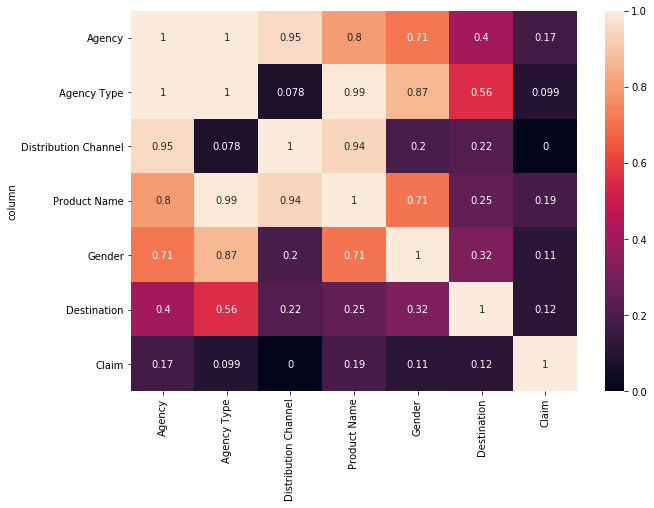

In [23]:
categorical=['Agency', 'Agency Type', 'Distribution Channel', 'Product Name','Gender', 'Destination','Claim']
cramers=pd.DataFrame({i:[cramers_v(df[i],df[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

In [24]:
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, df):
        self.df = df
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = ss.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [25]:
X = df.drop(['Claim'], axis=1)
ct = ChiSquare(df)
for c in X.columns:
    ct.TestIndependence(c, 'Claim')

ID is NOT an important predictor. (Discard ID from model)
Agency is IMPORTANT for Prediction
Agency Type is IMPORTANT for Prediction
Distribution Channel is NOT an important predictor. (Discard Distribution Channel from model)
Product Name is IMPORTANT for Prediction
Duration is IMPORTANT for Prediction
Destination is IMPORTANT for Prediction
Net Sales is IMPORTANT for Prediction
Commision (in value) is IMPORTANT for Prediction
Gender is IMPORTANT for Prediction
Age is IMPORTANT for Prediction


In [26]:
df.drop(columns=['Distribution Channel','Agency Type'],axis=1,inplace=True)

In [27]:
num=df.select_dtypes(include=np.number).columns.tolist()
cat=df.select_dtypes(include=np.object).columns.tolist()


In [28]:
num=df[num]
cat=df[cat]
num=num[['ID','Duration', 'Net Sales', 'Commision (in value)', 'Age']]

In [29]:
cat=pd.get_dummies(cat,drop_first=True)
cat.head(10)

,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,...,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA,Gender_M,Gender_Null
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
from sklearn.linear_model import LogisticRegression
y=df['Claim']
lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=10, verbose=3)
rfe.fit(cat, y)
rfe_df1 = rfe.fit_transform(cat, y)

Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
F

Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 fe

In [31]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), cat.columns)))

Features sorted by their rank:
[(1, 'Agency_EPX'), (1, 'Agency_TST'), (1, 'Destination_MYANMAR'), (1, 'Destination_NEPAL'), (1, 'Gender_Null'), (1, 'Product Name_2 way Comprehensive Plan'), (1, 'Product Name_24 Protect'), (1, 'Product Name_Basic Plan'), (1, 'Product Name_Travel Cruise Protect'), (1, 'Product Name_Value Plan'), (2, 'Destination_ITALY'), (3, 'Destination_CZECH REPUBLIC'), (4, 'Product Name_Annual Travel Protect Gold'), (5, 'Product Name_Annual Silver Plan'), (6, 'Product Name_Annual Gold Plan'), (7, 'Agency_RAB'), (8, 'Destination_SRI LANKA'), (9, 'Destination_SOUTH AFRICA'), (10, 'Destination_SWITZERLAND'), (11, 'Product Name_Single Trip Travel Protect Platinum'), (12, 'Agency_C2B'), (13, 'Destination_INDIA'), (14, 'Agency_ART'), (15, 'Agency_JZI'), (16, 'Agency_TTW'), (17, 'Destination_SINGAPORE'), (18, 'Destination_MALAYSIA'), (19, 'Destination_PHILIPPINES'), (20, 'Destination_CAMBODIA'), (21, 'Product Name_Cancellation Plan'), (22, 'Product Name_Single Trip Travel Pr

In [32]:
cat=cat[['Agency_EPX','Agency_TST','Gender_Null','Product Name_2 way Comprehensive Plan','Product Name_24 Protect','Product Name_Basic Plan','Product Name_Comprehensive Plan','Product Name_Premier Plan','Product Name_Travel Cruise Protect','Product Name_Value Plan']]

In [33]:
y=df.loc[:,df.columns=='Claim']

In [34]:
y.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(cat,y,random_state=10,test_size=0.3)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
LR=LogisticRegression(class_weight='balanced')

In [38]:
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score,roc_auc_score,precision_score,classification_report
acs=accuracy_score(y_test,y_pred)
acs

0.8571145984438876

In [40]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[12844,  2095],
       [   72,   155]], dtype=int64)

In [41]:
f1=f1_score(y_test,y_pred)
f1

0.12515139281388776

In [42]:
rec=recall_score(y_test,y_pred)
rec

0.6828193832599119

In [43]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7712912098038632

In [44]:
pcs=precision_score(y_test,y_pred)
pcs

0.06888888888888889

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=12)
x_train_1, y_train_1 = smote.fit_sample(x_train, y_train)
pd.value_counts(y_train_1)

1    34873
0    34873
dtype: int64

In [46]:
LR=LogisticRegression(random_state=5)
LR.fit(x_train_1,y_train_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=5, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred=LR.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [48]:
acs=accuracy_score(y_test,y_pred)
print(acs,"\n")
cm=confusion_matrix(y_test,y_pred)
print(cm,"\n")
rec=recall_score(y_test,y_pred)
print(rec,"\n")
pcs=precision_score(y_test,y_pred)
print(pcs)
cl=classification_report(y_test,y_pred)
print(cl)

0.8622576816563365 

[[12924  2015]
 [   74   153]] 

0.6740088105726872 

0.0705719557195572
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     14939
           1       0.07      0.67      0.13       227

    accuracy                           0.86     15166
   macro avg       0.53      0.77      0.53     15166
weighted avg       0.98      0.86      0.91     15166



In [49]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(random_state=2)
tree.fit(x_train_1,y_train_1)
y_pred=tree.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
acs=accuracy_score(y_test,y_pred)
print(acs,"\n")
cm=confusion_matrix(y_test,y_pred)
print(cm,"\n")
rec=recall_score(y_test,y_pred)
print(rec,"\n")
pcs=precision_score(y_test,y_pred)
print(pcs)

0.8622576816563365 

[[12924  2015]
 [   74   153]] 

0.6740088105726872 

0.0705719557195572


In [51]:
from sklearn.ensemble import RandomForestClassifier
rtree=RandomForestClassifier(n_estimators=100)
rtree.fit(x_train_1,y_train_1)
y_pred=rtree.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [52]:
acs=accuracy_score(y_test,y_pred)
print(acs,"\n")
cm=confusion_matrix(y_test,y_pred)
print(cm,"\n")
rec=recall_score(y_test,y_pred)
print(rec,"\n")
pcs=precision_score(y_test,y_pred)
print(pcs)

0.8622576816563365 

[[12924  2015]
 [   74   153]] 

0.6740088105726872 

0.0705719557195572


In [53]:
from sklearn.ensemble import VotingClassifier
model1 = DecisionTreeClassifier(random_state=2)
model2 = LogisticRegression(random_state=0)
model3 = RandomForestClassifier(random_state=1)
model = VotingClassifier(estimators=[('dt', model1), ('lr', model2),('rf',model3)], voting='hard')
model.fit(x_train_1,y_train_1)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [54]:
acs=accuracy_score(y_test,y_pred)
print(acs,"\n")
cm=confusion_matrix(y_test,y_pred)
print(cm,"\n")
rec=recall_score(y_test,y_pred)
print(rec,"\n")
pcs=precision_score(y_test,y_pred)
print(pcs)

0.8622576816563365 

[[12924  2015]
 [   74   153]] 

0.6740088105726872 

0.0705719557195572


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gtree = GradientBoostingClassifier(n_estimators=100)
gtree.fit(x_train_1,y_train_1)
y_pred=gtree.predict(x_test)
y_pred

In [ ]:
acs=accuracy_score(y_test,y_pred)
print(acs,"\n")
cm=confusion_matrix(y_test,y_pred)
print(cm,"\n")
rec=recall_score(y_test,y_pred)
print(rec,"\n")
pcs=precision_score(y_test,y_pred)
print(pcs)

In [58]:
data=pd.read_csv("test.csv")

In [59]:
data.fillna('Null',inplace=True)

In [60]:
data1=data['Duration']<0
data1.sum()

2

In [61]:
data.loc[data['Duration'] < 0, 'Duration'] = int(49)

In [62]:
data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,25902,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,58,ICELAND,49.5,29.7,Null,47
1,19535,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,SINGAPORE,20.0,0.0,Null,24
2,43717,EPX,Travel Agency,Online,2 way Comprehensive Plan,68,VIET NAM,20.0,0.0,Null,36
3,48271,EPX,Travel Agency,Online,2 way Comprehensive Plan,41,CHINA,28.0,0.0,Null,36
4,52318,EPX,Travel Agency,Online,Cancellation Plan,16,SINGAPORE,11.0,0.0,Null,36


In [63]:
a= data['Net Sales']<data['Commision (in value)']
data.loc[a, 'Commision (in value)'] = 0

In [64]:
data.drop(columns=['Distribution Channel','Agency Type'],axis=1,inplace=True)

In [65]:
x1=data
x1_dummy=pd.get_dummies(x1,columns=['Agency','Product Name','Destination','Gender'],drop_first=True)

In [66]:
x1=x1_dummy[['Agency_EPX','Agency_TST','Gender_Null','Product Name_2 way Comprehensive Plan','Product Name_24 Protect','Product Name_Basic Plan','Product Name_Comprehensive Plan','Product Name_Premier Plan','Product Name_Travel Cruise Protect','Product Name_Value Plan']]

In [67]:
data['Claim']=rtree.predict(x1)

In [68]:
df=data[['ID','Claim']]

In [69]:
df.head()

,ID,Claim
0,25902,0
1,19535,0
2,43717,0
3,48271,0
4,52318,0


In [70]:
export_csv = df.to_csv('Fail.csv', index = None, header=True)